# Hash functions and multiplanes


In this lab, we are going to practice the most important concepts related to the hash functions . 
A key point for the lookup using hash functions is the calculation of the hash key or bucket id that we assign for a given entry. In this notebook, we will cover:

* Basic hash tables
* Multiplanes
* Random planes

# Basis Hash Tables

Hash tables are data structures that allow indexing data to make lookup task more efficient.

In [54]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from utils_nb import plot_vectors

pp = pprint.PrettyPrinter(indent = 4) #Instantiate a pretty printer

In the next cell, we will define a straightforward hash function for integer numbers. The function will receive a list of integer numbers and the desired amount of buckets. The function will produce a hash table stored as a dictionary, where keys contain the hash keys, and the values will provide the hashed elements of the input list. 

The hash function is just the remainder of the integer division between each element and the desired number of buckets.

In [55]:
def basic_hash_table(value_1, n_buckets):
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)}
    
    for value in value_1:
        hash_value = hash_function(value, n_buckets) # Get the hash key for the given value
        hash_table[hash_value].append(value) # add the element to the corresponding bucket
        
    return hash_table

Hash table function in action

In [56]:
value_1 = [100, 10, 14, 17, 97] # set of values to hash
hash_table_example = basic_hash_table(value_1, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


# Planes
Multiplanes hash functions are other types of hash functions. Multiplanes hash functions are based on the idea of numbering every single region that is formed by the intersection of n planes.

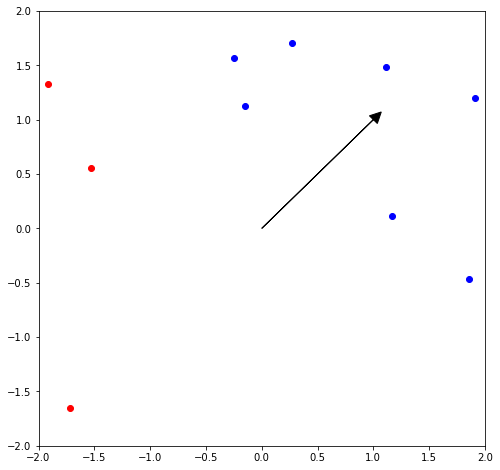

In [57]:
P = np.array([[1,1]]) # single plane
fig, ax1 = plt.subplots(figsize = (8,8))

plot_vectors([P], axes = [2,2], ax =ax1) # plot the plane P as a vector

# plot random points.
for i in range(0, 10):
    v1 = np.array(np.random.uniform(-2, 2, 2))
    side_of_plane = np.sign(np.dot(P, v1.T))
    
    # color the points depending on the sign of the result of np.dot(P, point.T)

    if side_of_plane ==1:
        ax1.plot([v1[0]], [v1[1]], 'bo') # plot blue points
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro') # plot the points
plt.show()

The first thing to note is that the vector that defines the plane does not mark the boundary between the two sides of the plane. It marks the direction in which you find the 'positive' side of the plane. Not intuitive at all!

If we want to plot the separation plane, we need to plot a line that is perpendicular to our vector `P`. We can get such a line using a $90^o$ rotation matrix.

Feel free to change the direction of the plane `P`.

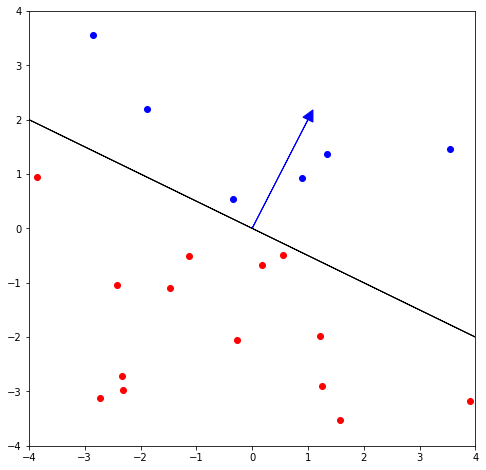

In [58]:
P = np.array([[1,2]])

# GET a new plane perpendicular to P. we use a rotation matrix

PT = np.dot([[0, 1], [-1, 0]], P.T).T

fig, ax1 = plt.subplots(figsize = (8, 8))

plot_vectors([P], colors =['b'], axes = [4,4], ax = ax1)

# Plot the plane P as a 2 vectors
# We scale by 2 just get the arrows outside the current box
plot_vectors([PT * 4, PT * -4], colors = ['k', 'k'], axes = [4,4], ax = ax1)

# plot 20 random points

for i in range(0, 20):
    v1 = np.array(np.random.uniform(-4,4,2))
    side_of_plane = np.sign(np.dot(P, v1.T))
    #color the points depending on the sign of the result of np.dot(P, point.T)
    if side_of_plane ==1:
        ax1.plot([v1[0]], [v1[1]], 'bo')
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro')
plt.show()

NOw, let us see what is inside the code that color the points

In [59]:
P = np.array([[1,1]])
v1 = np.array([[1,2]])
v2 = np.array([[-1,1]])
v3 = np.array([[-2, -1]])

In [60]:
np.dot(P, v1.T)

array([[3]])

In [61]:
np.dot(P, v2.T)

array([[0]])

In [62]:
np.dot(P, v3.T)

array([[-3]])

The function below checks in which side of the plane P is located the vector v

In [63]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct)
    sign_of_dot_product_scalar = sign_of_dot_product.item()
    return sign_of_dot_product_scalar


In [64]:
side_of_plane(P, v1)

1

In [65]:
side_of_plane(P, v2)

0

In [66]:
side_of_plane(P, v3)

-1

# Hash Function with multiple planes

we are going to define a hash function with a list of three custom planes in 2D.

In [67]:
P1 = np.array([[1,1]]) # first plane 2D
P2 = np.array([[-1, 1]]) # second plane 2D
P3 = np.array([[-1,-1]]) # third plane 2D
P_1 = [P1, P2, P3] # list of array. it is the multi plane

# vector to search
v = np.array([[2,2]])
print('P_1 = ',P_1)
print('v = ',v)

P_1 =  [array([[1, 1]]), array([[-1,  1]]), array([[-1, -1]])]
v =  [[2 2]]


The next function creates a hash value based on a set of planes. The output value is a combination of the side of the plane where the vector is localized with respect to the collection of planes.

We can think of this list of planes as a set of basic hash functions, each of which can produce only 1 or 0 as output.

In [68]:
def hash_multi_plane(P_1, v):
    hash_value = 0
    for i, P in enumerate(P_1):
        sign = side_of_plane(P, v)
        hash_i = 1 if sign >= 0 else 0
        hash_value += 2**i * hash_i
    return hash_value

In [69]:
hash_multi_plane(P_1, v) # find the number of the plane that contains this value

3

# Random Planes

In [70]:
# in The cell below, we create a set of three random planes

In [71]:
np.random.seed(0)
num_dimensions = 2 # is 300 in assignement
num_planes =3
random_planes_matrix = np.random.normal(size = (num_planes, num_dimensions))
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [73]:
v = np.array([[2,2]])
v

array([[2, 2]])

The `next function` is similar to the `side_of_plane()` function, but it evaluates more than a plane each time. The result is an array with the side of the plane of `v`, for the set of planes `P`

In [74]:
# side of the plane function

def side_of_plane_matrix(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct)
    return sign_of_dot_product

Get the side of the plane of the vector `[2, 2]` for the set of random planes. 

In [75]:
side_1 = side_of_plane_matrix(random_planes_matrix, v)
side_1

array([[1.],
       [1.],
       [1.]])

Now, let us use the former function to define our multiplane hash function

In [76]:
def hash_multi_plane_matrix(P, v , num_planes):
    sides_matrix = side_of_plane_matrix(P, v)
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item()
        hash_i = 1 if sign >= 0 else 0
        hash_value += 2**i * hash_i
    return hash_value

Print the bucket hash for the vector `v = [2,2]`

In [77]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

#### Note
This showed you how to make one set of random planes.  You will make multiple sets of random planes in order to make the approximate nearest neighbors more accurate.

## Document vectors

Before we finish this lab, remember that you can represent a document as a vector by adding up the word vectors for the words inside the document. In this example, our embedding contains only three words, each represented by a 3D array.

In [78]:
word_embedding = {'I': np.array([1,0,1]),
                 'Love': np.array([-1,0,1]),
                 'learning': np.array([1,0,1])
                 }
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = n

p.array([0,0,0])
for word in words_in_document:
    document_embedding += word_embedding.get(word, 0)
print(document_embedding)

[2 0 2]
